# Week 8: Explore Data

As I explore the dataset and start looking for existing research this week, I decided to follow some methods outlined in the paper 'Vocational training costs and economic benefits: Exploring the interactions' by Samoliuk, Natalia; Bilan, Yuriy; and Mishchuk, Halyna. The paper examines the economic benefits of vocational training costs (VTC) by focusing on several key questions. What is the impact of vocational training costs (VTC) on macroeconomic results? How do features of personnel training programs differ between profitable and unprofitable enterprises?
What are the specifics of training and the efficiency of vocational training funds from the perspective of entrepreneurs and employees? To answer these questions, the study utilizes statistical data from Eurostat, specifically looking at indicators like vocational training costs per employee and GDP per capita from 2016. Additionally, surveys targeting entrepreneurs and employees provide further insights into the dynamics and effectiveness of vocational training costs. Methodologically, the research employs the Fechner correlation coefficient for relational estimation, facilitating the assessment of deviations from mean values and analyzing the homogeneity of impacts across different countries. Traditional statistical analysis combined with sociological research methods and graph-analytical approaches are also applied to process the data, ultimately aiming to elucidate the relationship between vocational training costs and economic performance alongside the effectiveness of training strategies within various enterprises.

The study by Samoliuk, Natalia; Bilan, Yuriy; and Mishchuk, Halyna focuses on data collected in 2016, providing a useful benchmark for understanding vocational training patterns across countries. I aim to expand on this by leveraging additional data from 2015 and 2020 to explore the role of training in economic resilience during the COVID-19 shock. Specifically, I am interested in whether countries with higher levels of vocational training prior to 2020 experienced smaller declines in GDP per capita when the pandemic hit. By comparing pre-2020 training intensity with the percentage drop in GDP in 2020, this approach tests the idea that investment in training may act as a buffer against sudden economic shocks, providing insight into the protective role of human capital.

For the initial draft regression, I’ll focus on this subset of the dataset—freq = A, size_emp = 10-49, cost type = DIR, and unit = PPS_EU27_2020 across multiple countries. This smaller, more uniform slice makes it easier to test the regression approach, spot missing data or outliers, and model a simpler relationship, such as how cost varies across countries. Once the draft is working, I can expand to the full dataset, including other cost types, units, and size classes, improving cleaning, handling anomalies, and refining the regression. This stepwise approach makes the first regression exploratory, emphasizing feasibility and speed, with later iterations showing more robust results.

In [4]:
import os
print(os.getcwd())

/home/idies/workspace/Storage/emberye/persistent/as.180.369/contrib/emberye


In [12]:
import pandas as pd

# Step 1: Load CVT training cost data
cvt_data = pd.read_csv('estat_trng_cvt_17s.tsv', sep='\t')

# Select rows 67-73 (Python 0-indexed: 66:73) and column D (index 3)
cvt_subset = cvt_data.iloc[66:73, 3].to_frame(name='CVT_cost')

# Step 2: Load GDP data
gdp_data = pd.read_csv('estat_tec00001.tsv', sep='\t')

# Select rows 3-9 (Python 0-indexed: 2:9) and column D (index 3)
gdp_subset = gdp_data.iloc[2:9, 3].to_frame(name='GDP_2015')

# Step 3: Add country codes manually
countries = ['AT','BE','BG','CH','CY','CZ','DE']
cvt_subset['country'] = countries
gdp_subset['country'] = countries

# Step 4: Merge datasets on country
df = pd.merge(cvt_subset, gdp_subset, on='country')

# Step 5: Inspect the resulting DataFrame
print(df)

  CVT_cost country GDP_2015
0     272       AT   36860 
1      78       BE    6560 
2      96       BG   75460 
3   126 bd      CH   20810 
4     176       CY   16230 
5     153       CZ   37950 
6     132       DE   47900 


/home/idies/mambaforge/envs/econark/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:               GDP_2015   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.199
Method:                 Least Squares   F-statistic:                  0.005362
Date:                Mon, 27 Oct 2025   Prob (F-statistic):              0.944
Time:                        13:47:27   Log-Likelihood:                -79.695
No. Observations:                   7   AIC:                             163.4
Df Residuals:                       5   BIC:                             163.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.628e+04   2.56e+04      1.418      0.2

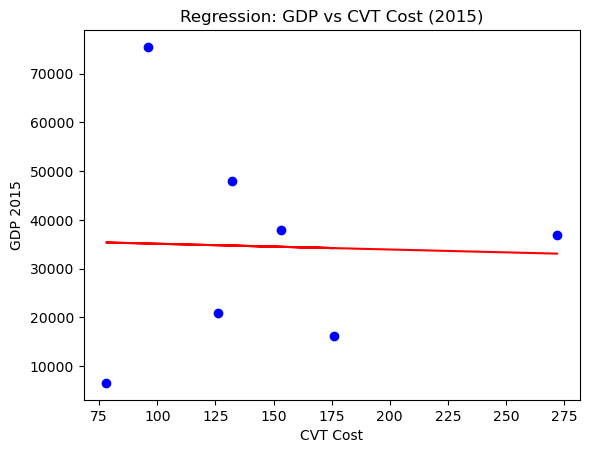

In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Your existing DataFrame
data = {
    'CVT_cost': [272, 78, 96, 126, 176, 153, 132],
    'country': ['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE'],
    'GDP_2015': [36860, 6560, 75460, 20810, 16230, 37950, 47900]
}

df = pd.DataFrame(data)

# Clean CVT_cost if there are non-numeric entries
df['CVT_cost'] = pd.to_numeric(df['CVT_cost'], errors='coerce')
df = df.dropna()

# Regression
X = sm.add_constant(df['CVT_cost'])  # add intercept
y = df['GDP_2015']

model = sm.OLS(y, X).fit()
print(model.summary())

# Plot
plt.scatter(df['CVT_cost'], df['GDP_2015'], color='blue')
plt.plot(df['CVT_cost'], model.predict(X), color='red')
plt.xlabel('CVT Cost')
plt.ylabel('GDP 2015')
plt.title('Regression: GDP vs CVT Cost (2015)')
plt.show()

The negative correlation is not what I am expecting, but this is also due to the limiatation of the number of countries i have included here. I will work on refining the data in the following week.